In [33]:
#callback 함수를 이용한 주식 등락 예측을 위한 딥러닝
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint,EarlyStopping

import pandas as pd
import numpy
import os
import tensorflow as tf

# seed 값 설정
numpy.random.seed(3)
tf.random.set_seed(3)

In [34]:
df= pd.read_csv('D:\\ai\\final_term\\Google_stock.csv')

In [35]:
df

,Unnamed: 0,날짜,시가,고점,저점,종가,거래량,증감,시가-종가,최대-최소
0,0,"Dec19,2019",1351.82,1358.10,1348.98,1356.04,1469900.0,1,-4.22,9.12
1,1,"Dec20,2019",1363.35,1363.64,1349.00,1349.59,3315000.0,1,13.76,14.64
2,2,"Dec23,2019",1355.87,1359.80,1346.51,1348.84,883100.0,1,7.03,13.29
3,3,"Dec24,2019",1348.50,1350.26,1342.78,1343.56,347500.0,0,4.94,7.48
4,4,"Dec26,2019",1346.17,1361.33,1344.47,1360.40,667500.0,1,-14.23,16.86
...,...,...,...,...,...,...,...,...,...,...
248,248,"Dec14,2020",1775.00,1797.39,1757.21,1760.06,1600200.0,0,14.94,40.18
249,249,"Dec15,2020",1764.42,1771.42,1749.95,1767.77,1482300.0,1,-3.35,21.47
250,250,"Dec16,2020",1772.88,1773.00,1756.08,1763.00,1513500.0,1,9.88,16.92
251,251,"Dec17,2020",1768.51,1771.78,1738.66,1747.90,1623900.0,1,20.61,33.12


In [36]:
df_sam = df.sample(frac = 0.4)

In [37]:
df_sam

,Unnamed: 0,날짜,시가,고점,저점,종가,거래량,증감,시가-종가,최대-최소
16,16,"Jan14,2020",1439.01,1441.80,1428.37,1430.88,1558900.0,1,8.13,13.43
31,31,"Feb05,2020",1462.42,1463.84,1430.56,1448.23,1986200.0,0,14.19,33.28
139,139,"Jul10,2020",1506.15,1543.83,1496.54,1541.74,1856300.0,1,-35.59,47.29
65,65,"Mar25,2020",1126.47,1148.90,1086.01,1102.49,4081500.0,1,23.98,62.89
57,57,"Mar13,2020",1179.00,1219.76,1117.14,1219.73,3700100.0,1,-40.73,102.62
...,...,...,...,...,...,...,...,...,...,...
30,30,"Feb04,2020",1457.07,1469.50,1426.30,1447.07,3933000.0,1,10.00,43.20
222,222,"Nov05,2020",1781.00,1793.64,1750.51,1763.37,2065800.0,1,17.63,43.13
136,136,"Jul07,2020",1490.00,1516.80,1483.55,1485.18,1458200.0,0,4.82,33.25
247,247,"Dec11,2020",1763.06,1784.45,1760.00,1781.77,1220700.0,1,-18.71,24.45


In [68]:
dataset = df_sam.values 
X=dataset[:, 6:10]
Y= dataset[:,7]

In [69]:
X

array([[1558900.0, 1, 8.129999999999884, 13.430000000000064],
       [1986200.0, 0, 14.190000000000055, 33.279999999999966],
       [1856300.0, 1, -35.589999999999925, 47.28999999999997],
       [4081500.0, 1, 23.980000000000015, 62.89000000000011],
       [3700100.0, 1, -40.730000000000025, 102.61999999999986],
       [1601000.0, 0, 12.049999999999955, 26.79999999999995],
       [1050900.0, 0, 13.8599999999999, 18.980000000000018],
       [1503900.0, 0, -29.04999999999995, 36.87999999999988],
       [1820700.0, 1, -2.1700000000000728, 16.580000000000155],
       [1746200.0, 1, 4.0, 32.960000000000036],
       [1197800.0, 1, -5.140000000000099, 13.400000000000093],
       [1513500.0, 1, 9.88000000000011, 16.920000000000073],
       [3344500.0, 1, -30.69000000000005, 44.3800000000001],
       [1695500.0, 1, 4.3900000000001, 20.230000000000018],
       [1784600.0, 0, 26.87999999999988, 30.24000000000001],
       [3208500.0, 0, 14.960000000000036, 44.75999999999999],
       [1824000.0, 0,

In [70]:
Y

array([1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0], dtype=object)

In [71]:
#모델설정 과 컴파일
model = Sequential()
model.add(Dense(30,  input_dim=4, activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [72]:
#각 training 마다 모델을 저장할 폴더 만들기 
model_dir = './model_save.'
if not os.path.exists(model_dir):
    os.mkdir(model_dir)

In [73]:
#파일명에 epoch와 val_loss를 기록하도록 설정 
modelpath="./model_save/{epoch:02d}-{val_loss:.4f}.hdf5" 

# 모델 업데이트 및 저장
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)

In [74]:
# 학습 자동 중단 설정
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=100)

In [75]:
# 사이킷런을 사용하지 않고, 
# 모델 실행 과정에서 홀드 아웃 교차 검증(Holdout Cross Validation) 사용 - 테스트 데이터셋을 30%로 설정 

history = model.fit(X, Y, validation_split=0.3, epochs=3000, batch_size=500, verbose=2, callbacks=[checkpointer,early_stopping_callback])

Train on 70 samples, validate on 31 samples
Epoch 1/3000
 - 0s - loss: 150074.4844 - accuracy: 0.4857 - val_loss: 121109.2969 - val_accuracy: 0.5806

Epoch 00001: val_loss improved from inf to 121109.29688, saving model to ./model_save/01-121109.2969.hdf5
Epoch 2/3000
 - 0s - loss: 141729.6250 - accuracy: 0.4857 - val_loss: 114023.6484 - val_accuracy: 0.5806

Epoch 00002: val_loss improved from 121109.29688 to 114023.64844, saving model to ./model_save/02-114023.6484.hdf5
Epoch 3/3000
 - 0s - loss: 133437.4844 - accuracy: 0.4857 - val_loss: 106983.6328 - val_accuracy: 0.5806

Epoch 00003: val_loss improved from 114023.64844 to 106983.63281, saving model to ./model_save/03-106983.6328.hdf5
Epoch 4/3000
 - 0s - loss: 125198.7734 - accuracy: 0.4857 - val_loss: 99989.8359 - val_accuracy: 0.5806

Epoch 00004: val_loss improved from 106983.63281 to 99989.83594, saving model to ./model_save/04-99989.8359.hdf5
Epoch 5/3000
 - 0s - loss: 117014.1172 - accuracy: 0.4857 - val_loss: 93042.5312 - v


Epoch 00045: val_loss did not improve from 147.80392
Epoch 46/3000
 - 0s - loss: 317.6297 - accuracy: 0.4857 - val_loss: 1839.6593 - val_accuracy: 0.4194

Epoch 00046: val_loss did not improve from 147.80392
Epoch 47/3000
 - 0s - loss: 1675.7485 - accuracy: 0.5143 - val_loss: 3300.5071 - val_accuracy: 0.4194

Epoch 00047: val_loss did not improve from 147.80392
Epoch 48/3000
 - 0s - loss: 3006.6331 - accuracy: 0.5143 - val_loss: 4188.6021 - val_accuracy: 0.4194

Epoch 00048: val_loss did not improve from 147.80392
Epoch 49/3000
 - 0s - loss: 3815.7219 - accuracy: 0.5143 - val_loss: 4558.9307 - val_accuracy: 0.4194

Epoch 00049: val_loss did not improve from 147.80392
Epoch 50/3000
 - 0s - loss: 4153.1040 - accuracy: 0.5143 - val_loss: 4461.1743 - val_accuracy: 0.4194

Epoch 00050: val_loss did not improve from 147.80392
Epoch 51/3000
 - 0s - loss: 4064.0474 - accuracy: 0.5143 - val_loss: 3940.3184 - val_accuracy: 0.4194

Epoch 00051: val_loss did not improve from 147.80392
Epoch 52/30


Epoch 00098: val_loss did not improve from 58.00865
Epoch 99/3000
 - 0s - loss: 244.6419 - accuracy: 0.5143 - val_loss: 133.0309 - val_accuracy: 0.5806

Epoch 00099: val_loss did not improve from 58.00865
Epoch 100/3000
 - 0s - loss: 154.7442 - accuracy: 0.4857 - val_loss: 123.6985 - val_accuracy: 0.4194

Epoch 00100: val_loss did not improve from 58.00865
Epoch 101/3000
 - 0s - loss: 112.4435 - accuracy: 0.5143 - val_loss: 99.6707 - val_accuracy: 0.5806

Epoch 00101: val_loss did not improve from 58.00865
Epoch 102/3000
 - 0s - loss: 115.6986 - accuracy: 0.4857 - val_loss: 313.7525 - val_accuracy: 0.4194

Epoch 00102: val_loss did not improve from 58.00865
Epoch 103/3000
 - 0s - loss: 285.5898 - accuracy: 0.5143 - val_loss: 240.2213 - val_accuracy: 0.4194

Epoch 00103: val_loss did not improve from 58.00865
Epoch 104/3000
 - 0s - loss: 218.6018 - accuracy: 0.5143 - val_loss: 285.0201 - val_accuracy: 0.5806

Epoch 00104: val_loss did not improve from 58.00865
Epoch 105/3000
 - 0s - lo


Epoch 00151: val_loss did not improve from 44.35649
Epoch 152/3000
 - 0s - loss: 859.4404 - accuracy: 0.5143 - val_loss: 75.3932 - val_accuracy: 0.4194

Epoch 00152: val_loss did not improve from 44.35649
Epoch 153/3000
 - 0s - loss: 68.4356 - accuracy: 0.5143 - val_loss: 1230.9318 - val_accuracy: 0.5806

Epoch 00153: val_loss did not improve from 44.35649
Epoch 154/3000
 - 0s - loss: 1439.4803 - accuracy: 0.4857 - val_loss: 1756.9331 - val_accuracy: 0.5806

Epoch 00154: val_loss did not improve from 44.35649
Epoch 155/3000
 - 0s - loss: 2055.0430 - accuracy: 0.4857 - val_loss: 1578.1079 - val_accuracy: 0.5806

Epoch 00155: val_loss did not improve from 44.35649
Epoch 156/3000
 - 0s - loss: 1845.7729 - accuracy: 0.4857 - val_loss: 766.5484 - val_accuracy: 0.5806

Epoch 00156: val_loss did not improve from 44.35649
Epoch 157/3000
 - 0s - loss: 896.0171 - accuracy: 0.4857 - val_loss: 575.8580 - val_accuracy: 0.4194

Epoch 00157: val_loss did not improve from 44.35649
Epoch 158/3000
 - 0


Epoch 00204: val_loss did not improve from 3.32015
Epoch 205/3000
 - 0s - loss: 635.3751 - accuracy: 0.5143 - val_loss: 1057.3279 - val_accuracy: 0.4194

Epoch 00205: val_loss did not improve from 3.32015
Epoch 206/3000
 - 0s - loss: 963.0159 - accuracy: 0.5143 - val_loss: 932.8724 - val_accuracy: 0.4194

Epoch 00206: val_loss did not improve from 3.32015
Epoch 207/3000
 - 0s - loss: 849.6325 - accuracy: 0.5143 - val_loss: 372.0906 - val_accuracy: 0.4194

Epoch 00207: val_loss did not improve from 3.32015
Epoch 208/3000
 - 0s - loss: 338.7412 - accuracy: 0.5143 - val_loss: 621.0735 - val_accuracy: 0.5806

Epoch 00208: val_loss did not improve from 3.32015
Epoch 209/3000
 - 0s - loss: 725.7068 - accuracy: 0.4857 - val_loss: 880.8883 - val_accuracy: 0.5806

Epoch 00209: val_loss did not improve from 3.32015
Epoch 210/3000
 - 0s - loss: 1029.7546 - accuracy: 0.4857 - val_loss: 460.6805 - val_accuracy: 0.5806

Epoch 00210: val_loss did not improve from 3.32015
Epoch 211/3000
 - 0s - loss:


Epoch 00258: val_loss did not improve from 3.32015
Epoch 259/3000
 - 0s - loss: 842.8957 - accuracy: 0.5143 - val_loss: 416.8629 - val_accuracy: 0.4194

Epoch 00259: val_loss did not improve from 3.32015
Epoch 260/3000
 - 0s - loss: 379.5309 - accuracy: 0.5143 - val_loss: 522.0430 - val_accuracy: 0.5806

Epoch 00260: val_loss did not improve from 3.32015
Epoch 261/3000
 - 0s - loss: 609.7115 - accuracy: 0.4857 - val_loss: 737.3837 - val_accuracy: 0.5806

Epoch 00261: val_loss did not improve from 3.32015
Epoch 262/3000
 - 0s - loss: 861.7184 - accuracy: 0.4857 - val_loss: 278.7404 - val_accuracy: 0.5806

Epoch 00262: val_loss did not improve from 3.32015
Epoch 263/3000
 - 0s - loss: 324.9760 - accuracy: 0.4857 - val_loss: 737.8706 - val_accuracy: 0.4194

Epoch 00263: val_loss did not improve from 3.32015
Epoch 264/3000
 - 0s - loss: 671.9753 - accuracy: 0.5143 - val_loss: 1189.9929 - val_accuracy: 0.4194

Epoch 00264: val_loss did not improve from 3.32015
Epoch 265/3000
 - 0s - loss: 

In [76]:
import matplotlib.pyplot as plt
import matplotlib.font_manager   # 한글 사용을 위해서 임포트 

# 테스트 데이터셋의 loss
vloss=history.history['val_loss']

# 학습 데이터셋의 accuracy 
acc=history.history['accuracy']

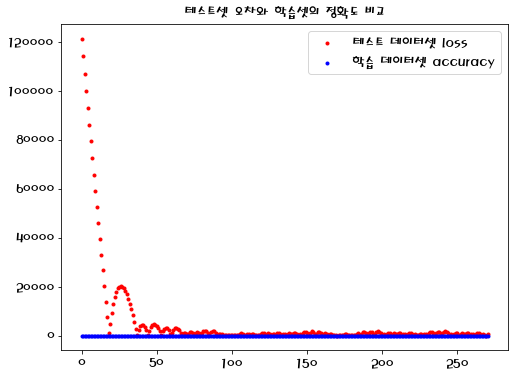

In [77]:
x_len = numpy.arange(len(acc))
plt.figure(figsize=(8,6))   #그래프의 크기 셋팅
font_path = "C:\\Windows\\Fonts\\HMKMMAG.TTF"
font_name = matplotlib.font_manager.FontProperties(fname=font_path).get_name()
plt.rc('font', family=font_name, size=14) 

# 학습 데이터셋의 accuracy는 파란색으로, 테스트 데이터셋의 loss는 빨간색으로 표시
plt.title('테스트셋 오차와 학습셋의 정확도 비교', fontsize=14)
plt.plot(x_len, vloss, "o", c="red",  markersize=3,  label='테스트 데이터셋 loss')
plt.plot(x_len, acc,   "o", c="blue", markersize=3,  label='학습 데이터셋 accuracy')
plt.legend() # 범례 출력

plt.show()